In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D, Conv1D, MaxPooling1D, Embedding
from tensorflow.keras.models import Model

In [2]:
df = pd.read_csv('/content/spam.csv', encoding='ISO-8859-1')

1. Data Preprocessing

In [3]:
df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1)
df.columns = ['label', 'message']

In [5]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df.columns

Index(['label', 'message'], dtype='object')

In [7]:
df.dtypes

label      object
message    object
dtype: object

In [8]:
df.info

<bound method DataFrame.info of      label                                            message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham              Will Ì_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]>

In [9]:
df.describe().T

,count,unique,top,freq
label,5572,2,ham,4825
message,5572,5169,"Sorry, I'll call later",30


In [10]:
df.isna().sum()

label      0
message    0
dtype: int64

In [11]:
df['binaryLabel'] = df['label'].map({'ham': 0, 'spam': 1})

In [12]:
df['binaryLabel'].value_counts() / len(df)

0    0.865937
1    0.134063
Name: binaryLabel, dtype: float64

In [13]:
ham = df[df['binaryLabel'] == 0]
spam = df[df['binaryLabel'] == 1]
print(spam.shape)
print(ham.shape)

(747, 3)
(4825, 3)


In [14]:
ham = ham.sample(spam.shape[0])
print(spam.shape)
print(ham.shape)

(747, 3)
(747, 3)


In [15]:
data = pd.concat([ham, spam])

In [16]:
data.shape

(1494, 3)

In [17]:
data['binaryLabel'].value_counts() / len(ham)

0    1.0
1    1.0
Name: binaryLabel, dtype: float64

In [18]:
X_train, X_test, y_train, y_test =  train_test_split(data['message'], data['binaryLabel'], test_size = 0.3, random_state = 0, shuffle = True)

In [19]:
max_vocab_size = 20000
tokenizer = Tokenizer(num_words = max_vocab_size)
tokenizer.fit_on_texts(X_train)
sequence_train = tokenizer.texts_to_sequences(X_train)
sequence_test = tokenizer.texts_to_sequences(X_test)

In [20]:
print(sequence_train[0], sequence_test[0])
print(len(sequence_train[0]), len(sequence_test[0]))

[2, 17, 62, 55, 109, 57, 4, 1836] [24, 53, 667, 9, 475, 225, 265, 1, 810, 24, 53, 15, 12, 50, 53, 1, 266, 37, 58, 71, 1004, 653, 435, 436, 393, 690]
8 26


In [21]:
wordToIDX = tokenizer.word_index
token = len(wordToIDX)
print(token)

3795


In [22]:
data_train = pad_sequences(sequence_train)


In [23]:
print(len(data_train[0]), len(data_train[1]), len(data_train[-1]))

121 121 121


In [24]:
leng = len(data_train[0])
T = data_train.shape[1]

In [25]:
data_test = pad_sequences(sequence_test, maxlen = leng)

2. Model Deployment

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Input layer
I = Input(shape=(T,))

# Embeding Dim
D = 20

# Define the CNN model
model = Sequential()

model.add(Embedding(input_dim = max_vocab_size, output_dim = D, input_length=T))

model.add(Conv1D(32, 3, activation='relu'))
model.add(MaxPooling1D(3))

model.add(Conv1D(64, 3, activation='relu'))
model.add(MaxPooling1D(3))

model.add(Conv1D(128, 3, activation='relu'))
model.add(GlobalMaxPooling1D())

model.add(Dense(1, activation = 'sigmoid'))

# model.add(Dropout(0.5))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 121, 20)           400000    
                                                                 
 conv1d_6 (Conv1D)           (None, 119, 32)           1952      
                                                                 
 max_pooling1d_4 (MaxPoolin  (None, 39, 32)            0         
 g1D)                                                            
                                                                 
 conv1d_7 (Conv1D)           (None, 37, 64)            6208      
                                                                 
 max_pooling1d_5 (MaxPoolin  (None, 12, 64)            0         
 g1D)                                                            
                                                                 
 conv1d_8 (Conv1D)           (None, 10, 128)          

In [40]:
model2 = Sequential()

model2.add(Embedding(input_dim = max_vocab_size, output_dim = D, input_length=T))

model2.add(Conv1D(32, 3, activation='relu'))
model2.add(MaxPooling1D(3))

model2.add(Conv1D(64, 3, activation='relu'))
model2.add(MaxPooling1D(3))

model2.add(Conv1D(128, 3, activation='relu'))
model2.add(GlobalMaxPooling1D())

model2.add(Dense(1, activation = 'sigmoid'))

model2.add(Dropout(0.2))

model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 121, 20)           400000    
                                                                 
 conv1d_15 (Conv1D)          (None, 119, 32)           1952      
                                                                 
 max_pooling1d_10 (MaxPooli  (None, 39, 32)            0         
 ng1D)                                                           
                                                                 
 conv1d_16 (Conv1D)          (None, 37, 64)            6208      
                                                                 
 max_pooling1d_11 (MaxPooli  (None, 12, 64)            0         
 ng1D)                                                           
                                                                 
 conv1d_17 (Conv1D)          (None, 10, 128)          

In [37]:
spamclf = model.fit(x = data_train, y = y_train, epochs = 10, validation_data=(data_test, y_test))

Epoch 1/10
33/33 [==============================] - 2s 33ms/step - loss: 0.6453 - accuracy: 0.5483 - val_loss: 0.5753 - val_accuracy: 0.7506
Epoch 2/10
33/33 [==============================] - 1s 24ms/step - loss: 0.4523 - accuracy: 0.8478 - val_loss: 0.3637 - val_accuracy: 0.8976
Epoch 3/10
33/33 [==============================] - 1s 23ms/step - loss: 0.1909 - accuracy: 0.9512 - val_loss: 0.2147 - val_accuracy: 0.9131
Epoch 4/10
33/33 [==============================] - 1s 24ms/step - loss: 0.0974 - accuracy: 0.9770 - val_loss: 0.1876 - val_accuracy: 0.9287
Epoch 5/10
33/33 [==============================] - 1s 31ms/step - loss: 0.0736 - accuracy: 0.9809 - val_loss: 0.1703 - val_accuracy: 0.9332
Epoch 6/10
33/33 [==============================] - 1s 35ms/step - loss: 0.0569 - accuracy: 0.9847 - val_loss: 0.1725 - val_accuracy: 0.9310
Epoch 7/10
33/33 [==============================] - 1s 36ms/step - loss: 0.0451 - accuracy: 0.9895 - val_loss: 0.1793 - val_accuracy: 0.9310
Epoch 8/10
33

In [41]:
spamclf = model2.fit(x = data_train, y = y_train, epochs = 10, validation_data=(data_test, y_test))

Epoch 1/10
33/33 [==============================] - 3s 34ms/step - loss: 2.0323 - accuracy: 0.6038 - val_loss: 0.5542 - val_accuracy: 0.8062
Epoch 2/10
33/33 [==============================] - 1s 24ms/step - loss: 1.7653 - accuracy: 0.7914 - val_loss: 0.3219 - val_accuracy: 0.8820
Epoch 3/10
33/33 [==============================] - 1s 23ms/step - loss: 1.6801 - accuracy: 0.8507 - val_loss: 0.2335 - val_accuracy: 0.9176
Epoch 4/10
33/33 [==============================] - 1s 25ms/step - loss: 1.8033 - accuracy: 0.8517 - val_loss: 0.1859 - val_accuracy: 0.9354
Epoch 5/10
33/33 [==============================] - 1s 25ms/step - loss: 1.5836 - accuracy: 0.8785 - val_loss: 0.1928 - val_accuracy: 0.9310
Epoch 6/10
33/33 [==============================] - 1s 25ms/step - loss: 1.4643 - accuracy: 0.8947 - val_loss: 0.1487 - val_accuracy: 0.9555
Epoch 7/10
33/33 [==============================] - 1s 25ms/step - loss: 1.6475 - accuracy: 0.8842 - val_loss: 0.1442 - val_accuracy: 0.9599
Epoch 8/10
33

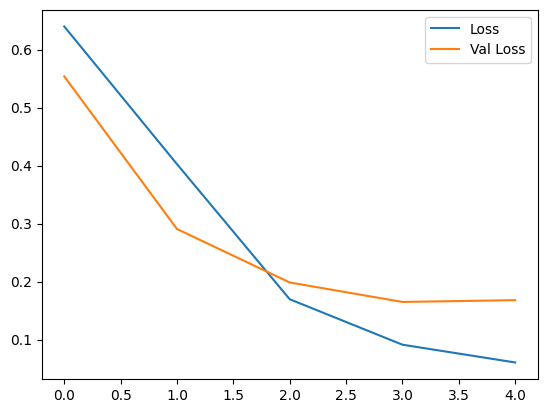

In [30]:
plt.plot(spamclf.history['loss'], label='Loss')
plt.plot(spamclf.history['val_loss'], label='Val Loss')
plt.legend()
plt.show()

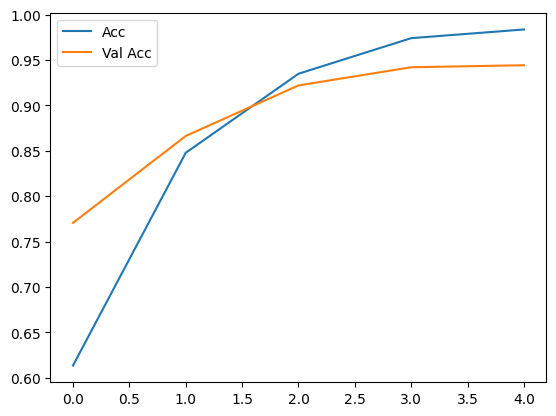

In [31]:
plt.plot(spamclf.history['accuracy'], label='Acc')
plt.plot(spamclf.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.show()